# GLM models - variables non PCA - Cracow

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels import graphics
from statsmodels.graphics.api import abline_plot
from scipy import stats
from matplotlib import pyplot as plt
import warnings
import itertools
import seaborn as sns
from sklearn.metrics import r2_score
warnings.filterwarnings("ignore")
import math
import functools 
import operator

In [2]:
def convertTuple(tup): 
    str = functools.reduce(operator.add, (tup)) 
    return str

In [3]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize']=(18,10)

In [4]:
data = pd.read_pickle('data/cracow_journeys.pkl')

In [5]:
data = data.groupby('Date').agg({'Journeys':'sum', 'Cloud_cover':'mean', 'Wind_speed':'mean',
       'Temperature':'mean', 'Pressure':'mean', 'Precipitation':'mean',
       'comp_0':'mean', 'comp_1':'mean', 'comp_2':'mean', 'comp_3':'mean', 'comp_4':'mean', 'Season':'mean'}).reset_index()

In [6]:
cracow = data.copy()
cracow.Date = pd.to_datetime(cracow.Date)

In [7]:
cracow

,Date,Journeys,Cloud_cover,Wind_speed,Temperature,Pressure,Precipitation,comp_0,comp_1,comp_2,comp_3,comp_4,Season
0,2019-01-01,895.0,7.333333,5.625000,2.550000,988.370833,0.091667,1.709407,-1.004130,-0.410442,0.899036,-0.124129,4
1,2019-01-02,3209.0,7.833333,6.875000,0.379167,983.708333,0.195833,2.718771,-0.769607,-0.738883,1.207612,0.264982,4
2,2019-01-03,3672.0,6.958333,5.708333,-2.662500,993.520833,0.025000,1.501121,-1.910966,-0.202301,1.112889,0.046122,4
3,2019-01-04,3457.0,7.583333,4.250000,-3.225000,995.825000,0.016667,1.175846,-2.001402,0.574084,0.605861,-0.334658,4
4,2019-01-05,804.0,7.791667,5.166667,0.708333,984.433333,0.204167,2.189998,-0.603717,0.018222,0.568699,0.125701,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,3039.0,7.375000,4.208333,2.029167,993.975000,0.020833,0.950485,-1.429825,0.282454,0.572786,-0.526376,4
361,2019-12-28,1984.0,7.958333,4.708333,-0.029167,1003.425000,0.025000,0.888791,-2.172830,0.678161,1.440685,-0.934670,4
362,2019-12-29,2083.0,7.916667,2.000000,-1.341667,1008.575000,0.000000,-0.119855,-2.392977,2.042766,0.618448,-1.260396,4
363,2019-12-30,5399.0,6.541667,3.166667,0.125000,1003.408333,0.000000,-0.010607,-2.039739,1.124608,0.831302,-0.596836,4


## Distribution of the dependent variable - Journeys

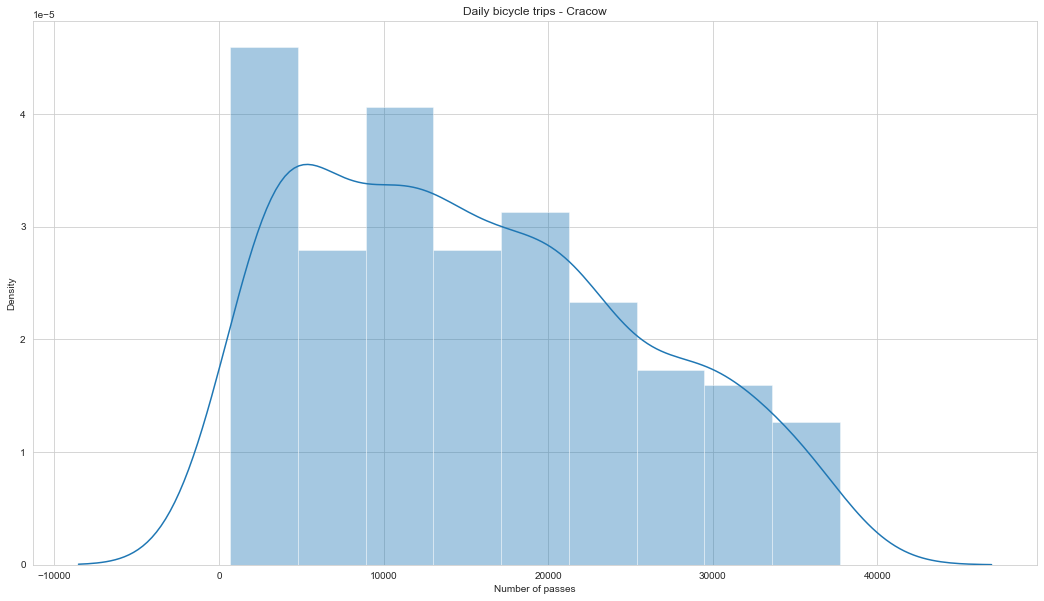

In [8]:
sns.distplot(cracow.Journeys, kde=True)
plt.title('Daily bicycle trips - Cracow')
plt.xlabel('Number of passes')
plt.show()

### The above distribution is closest to the Inverse Gaussian, Gamma (or Poisson) distribution

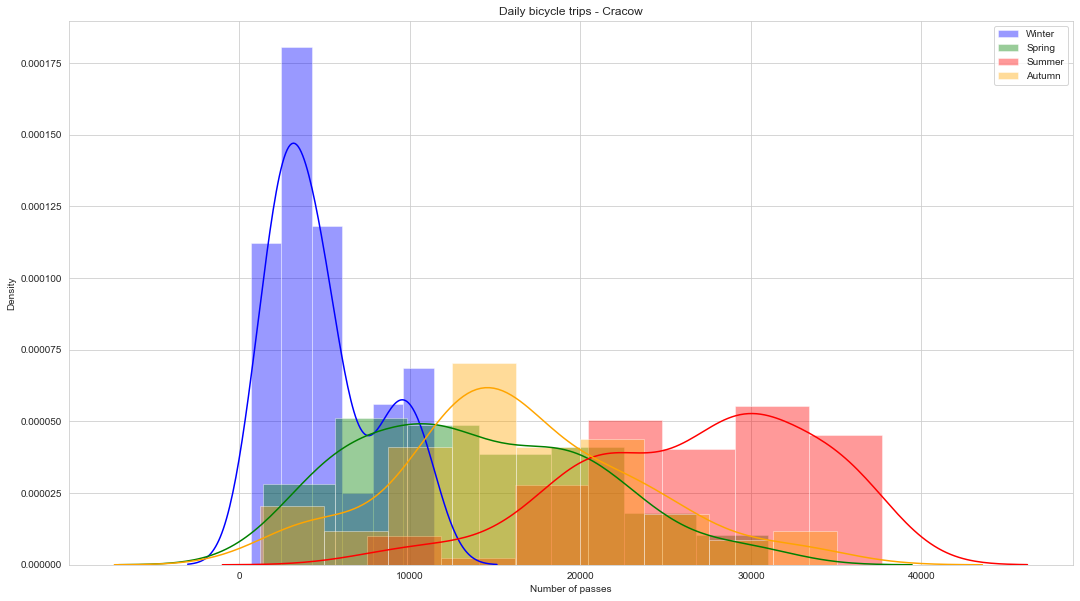

In [9]:
fig, ax = plt.subplots()
ax = sns.distplot(cracow.Journeys[cracow.Season == 4], kde=True, label='Winter', color='blue')
ax = sns.distplot(cracow.Journeys[cracow.Season == 1], kde=True, label='Spring', color='green')
ax = sns.distplot(cracow.Journeys[cracow.Season == 2], kde=True, label='Summer', color='red')
ax = sns.distplot(cracow.Journeys[cracow.Season == 3], kde=True, label='Autumn', color='orange')
plt.title('Daily bicycle trips - Cracow')
plt.legend()
plt.xlabel('Number of passes')
plt.show()

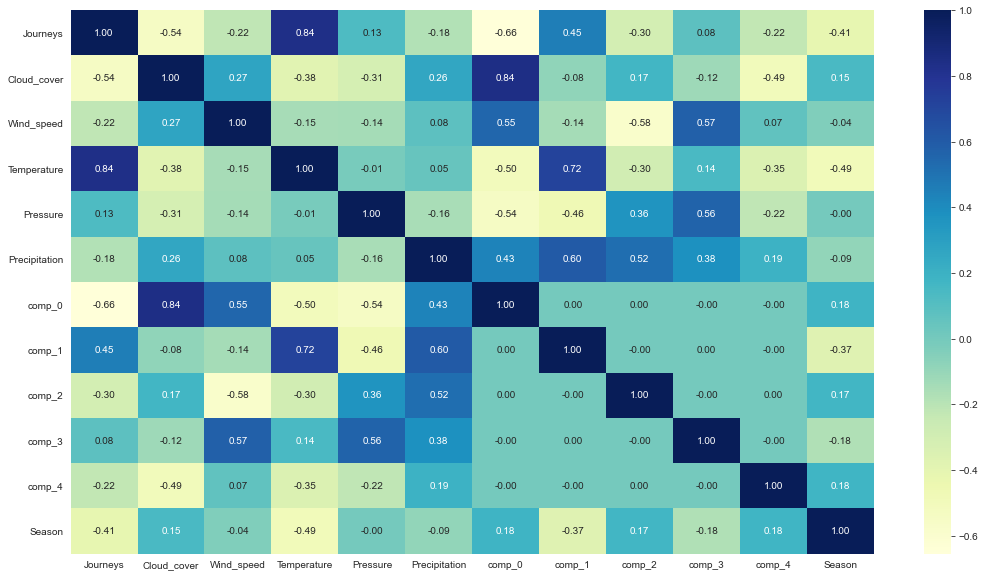

In [10]:
_ = sns.heatmap(cracow.corr(), cmap="YlGnBu", fmt='.2f', annot = True)

## Data modeling

In [11]:
columns = ['comp_0 ', 'comp_1 ']

help_t = []
for i in range(0, len(columns)+1):
        for subset in itertools.combinations(columns, i):
                help_t.append(subset)                

formula =[]
for i in range(1,len(help_t)):
    x = convertTuple(help_t[i])
    f = '%s' % x
    g = f.split(' ')
    h=''
    h = ' + '.join(g)[:-3]
    formula.append(h)

#### GLM models

In [12]:
familia = [sm.families.Gaussian(link=sm.families.links.log()),
           
           sm.families.InverseGaussian(link=sm.families.links.identity()),
           sm.families.InverseGaussian(link=sm.families.links.log()),
           
           sm.families.Gamma(link=sm.families.links.identity()),
           sm.families.Gamma(link=sm.families.links.log()),
           
           sm.families.Poisson(link=sm.families.links.identity()),
           sm.families.Poisson(link=sm.families.links.log())          
          ]
familia2 = ['Gaussian','Inverse Gaussian','Inverse Gaussian','Gamma','Gamma','Poisson','Poisson']

Model No. 1



                 Generalized Linear Model Regression Results                  
Dep. Variable:               Journeys   No. Observations:                  365
Model:                            GLM   Df Residuals:                      363
Model Family:                Gaussian   Df Model:                            1
Link Function:                    log   Scale:                      5.9194e+07
Method:                          IRLS   Log-Likelihood:                -3783.0
Date:                Thu, 26 Aug 2021   Deviance:                   2.1487e+10
Time:                        16:40:13   Pearson chi2:                 2.15e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5799      0.031    3

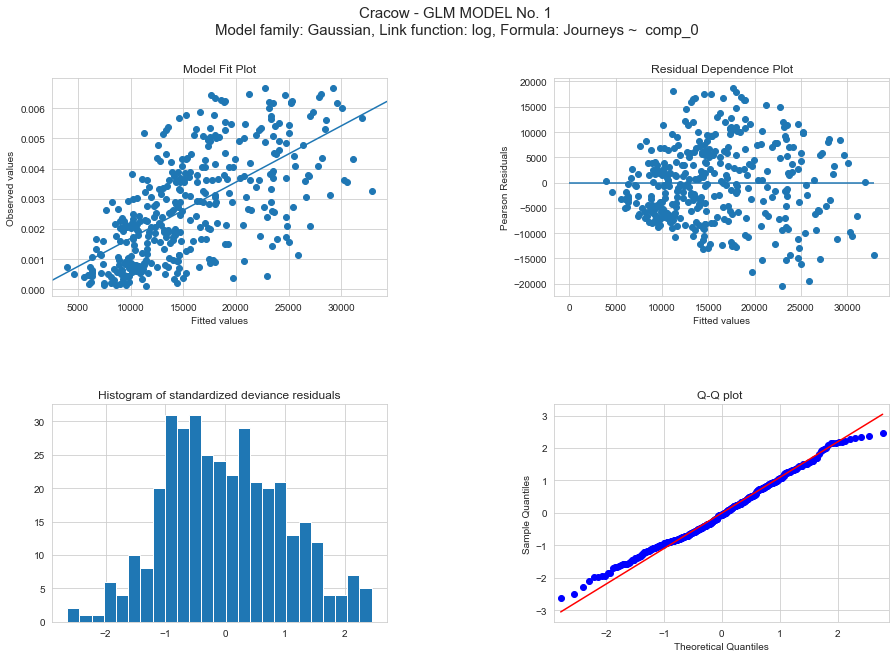

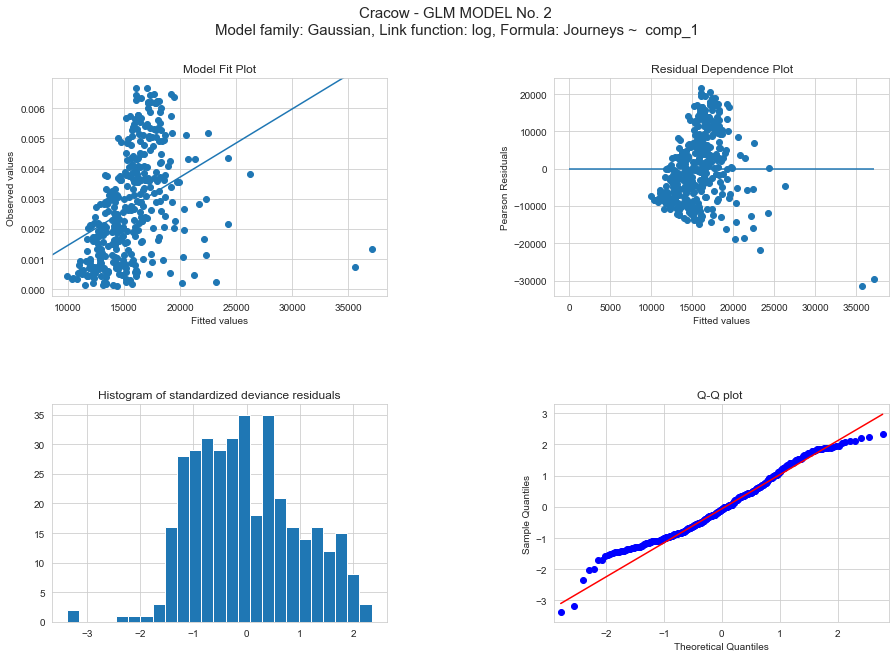

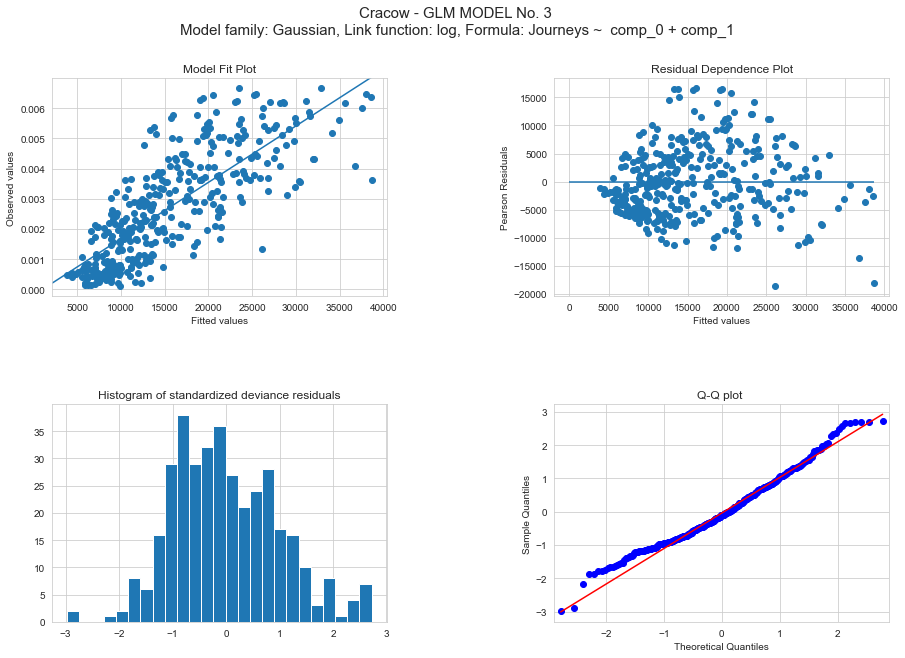

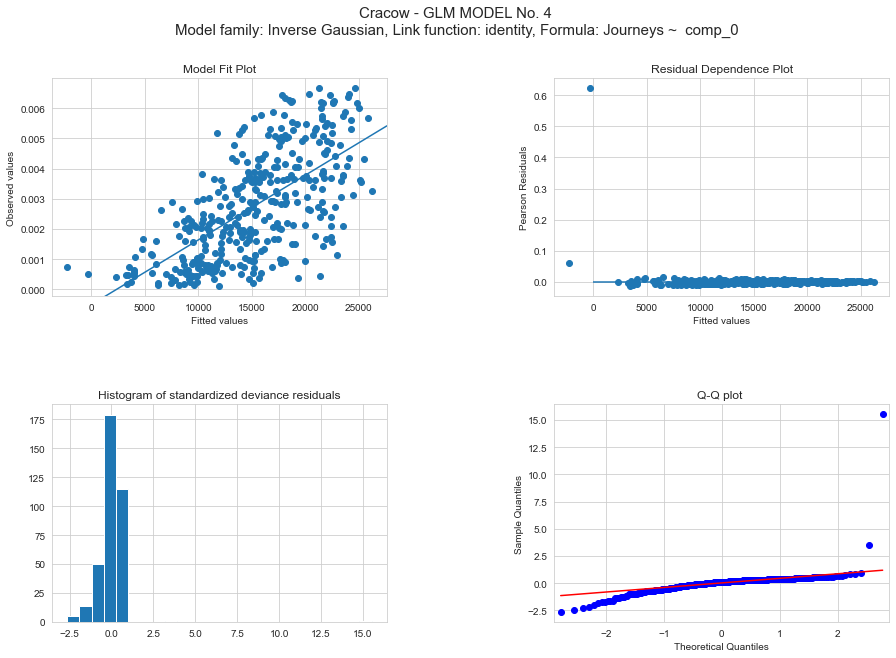

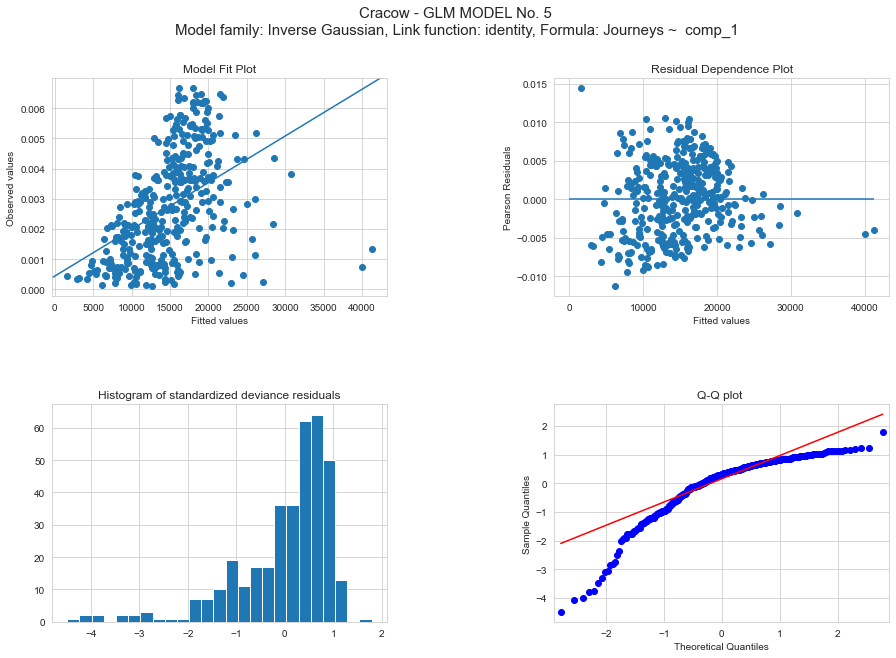

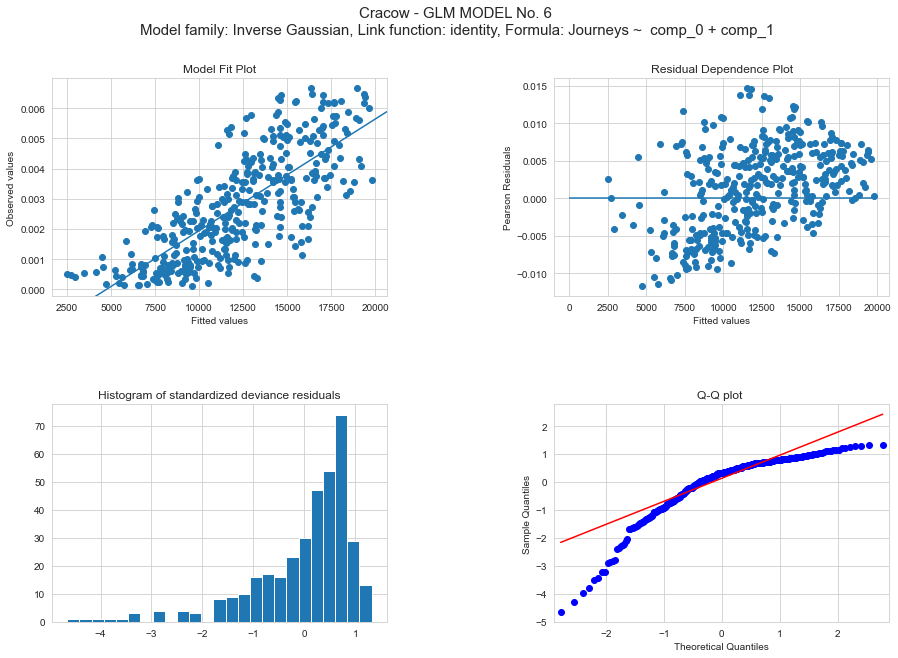

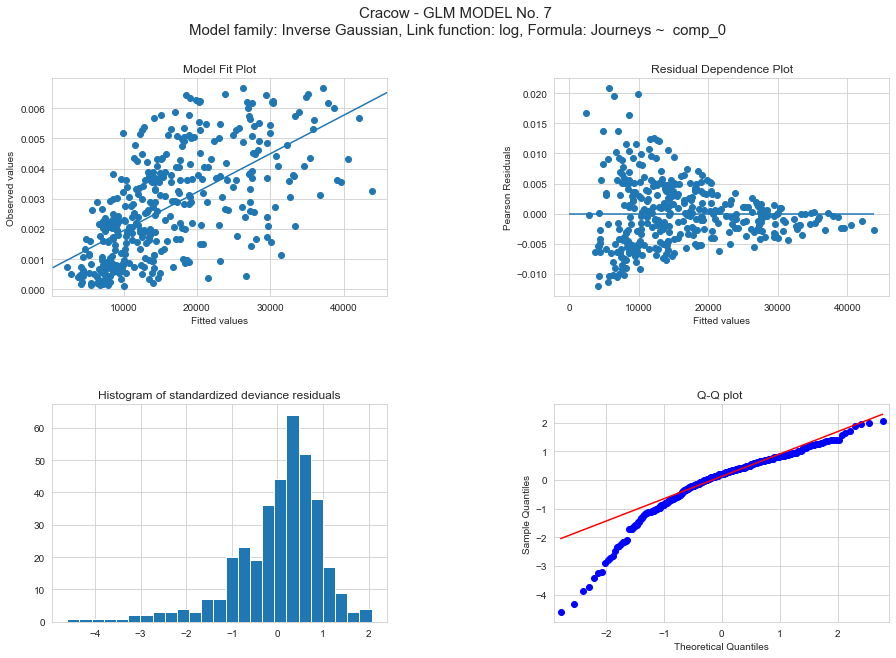

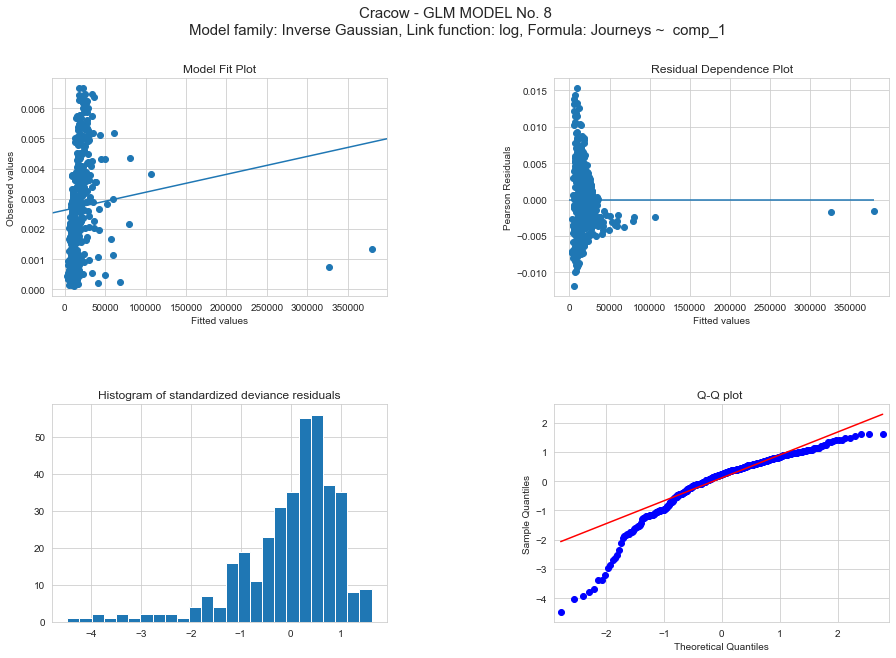

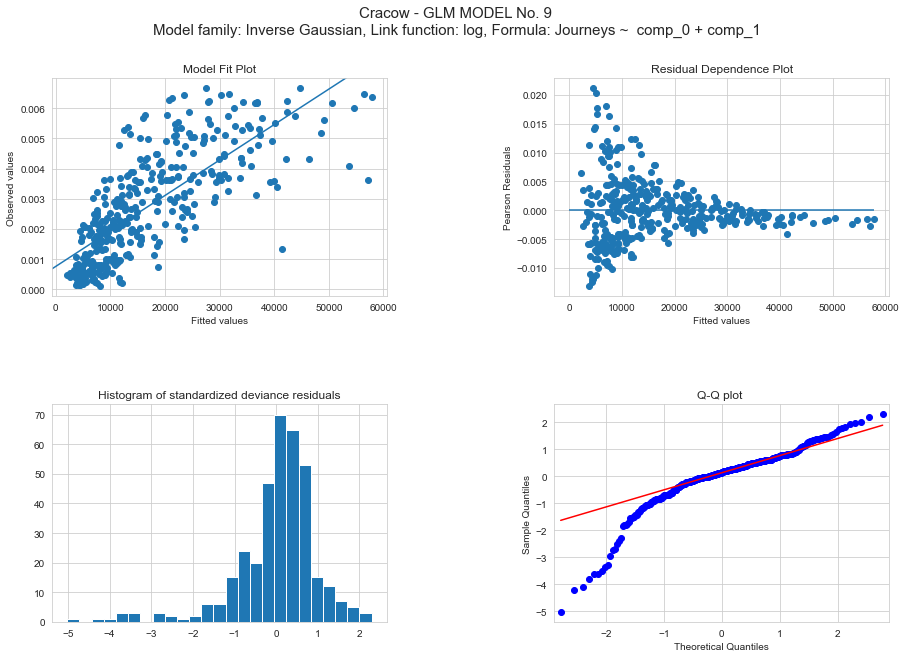

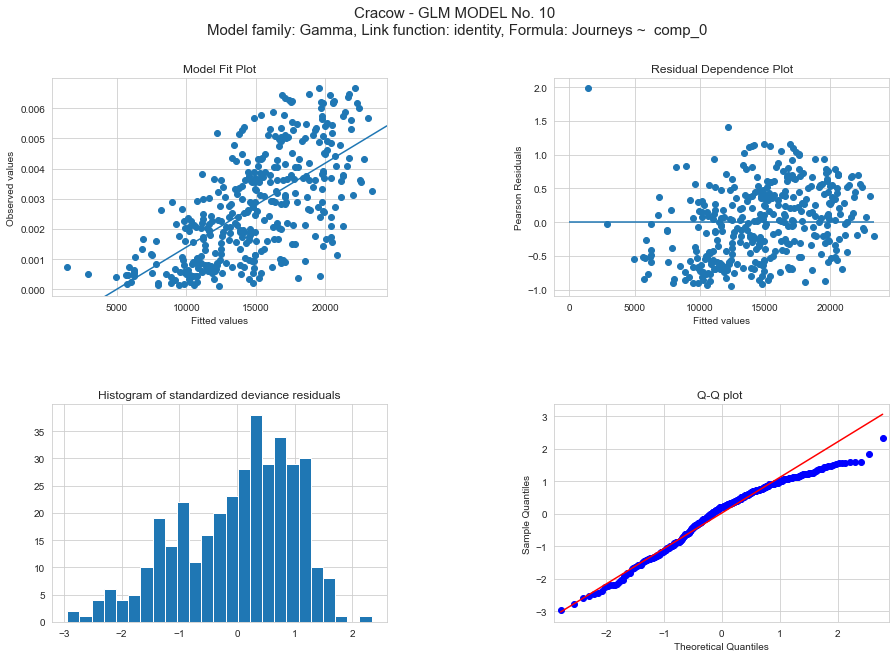

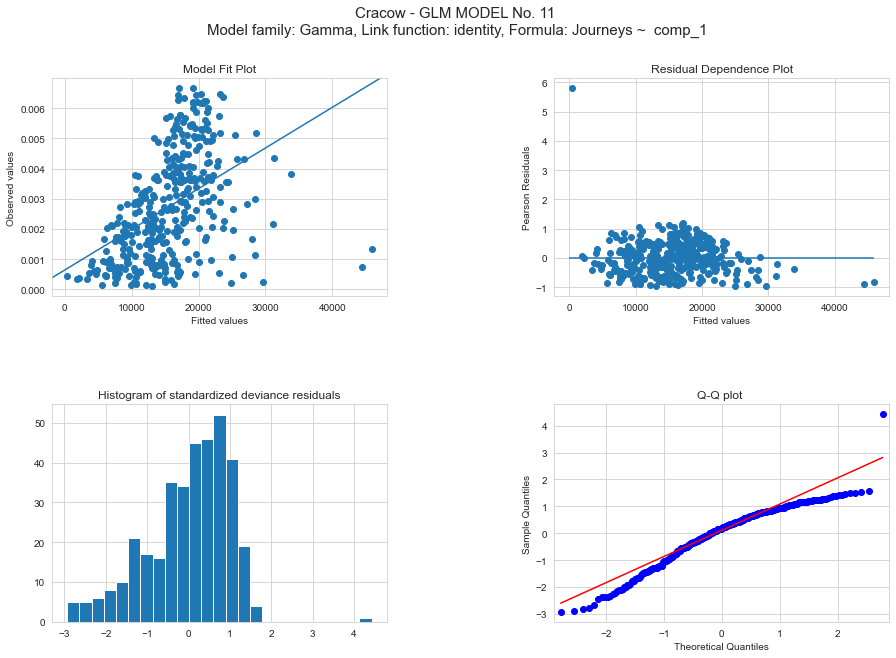

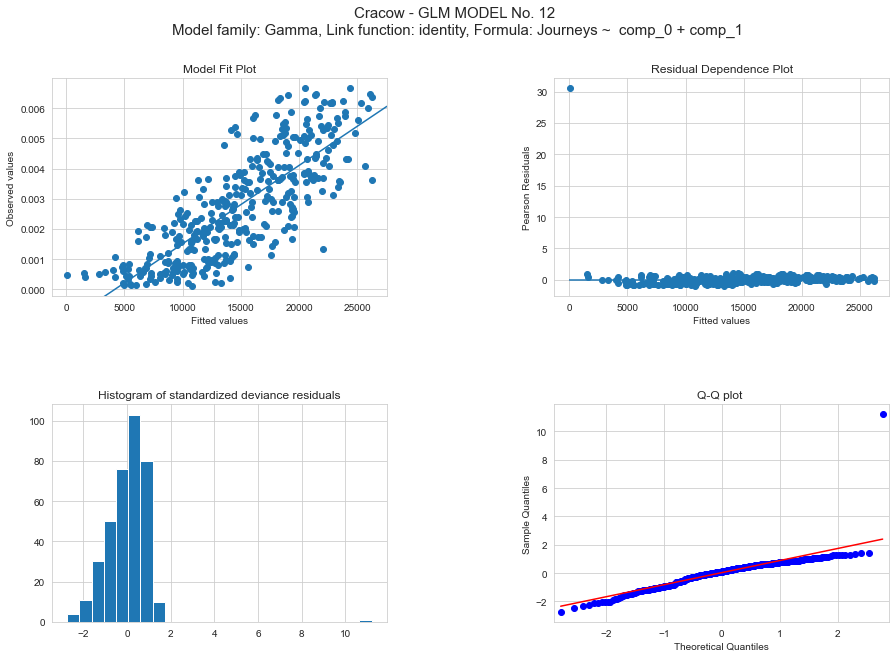

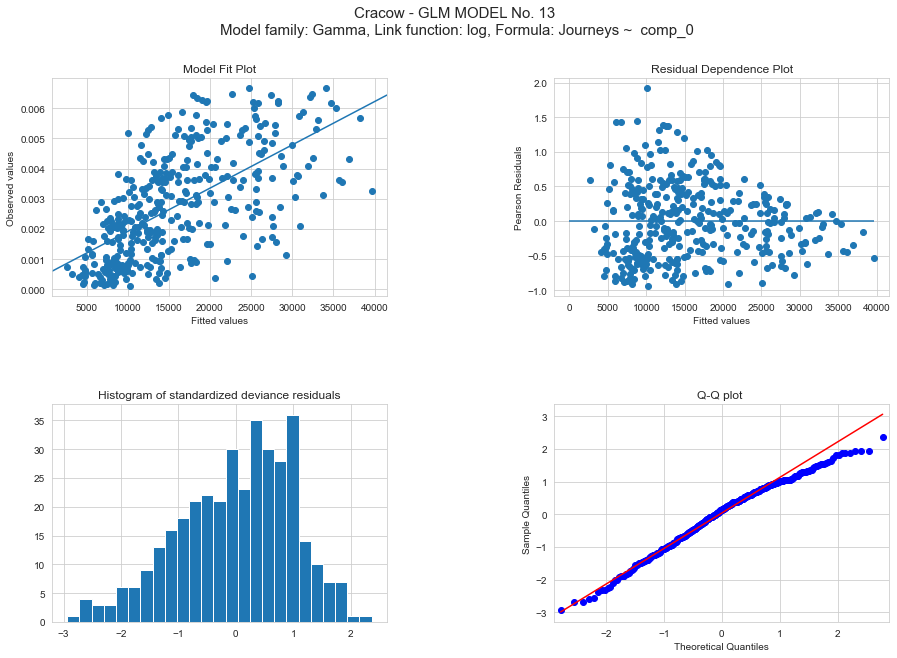

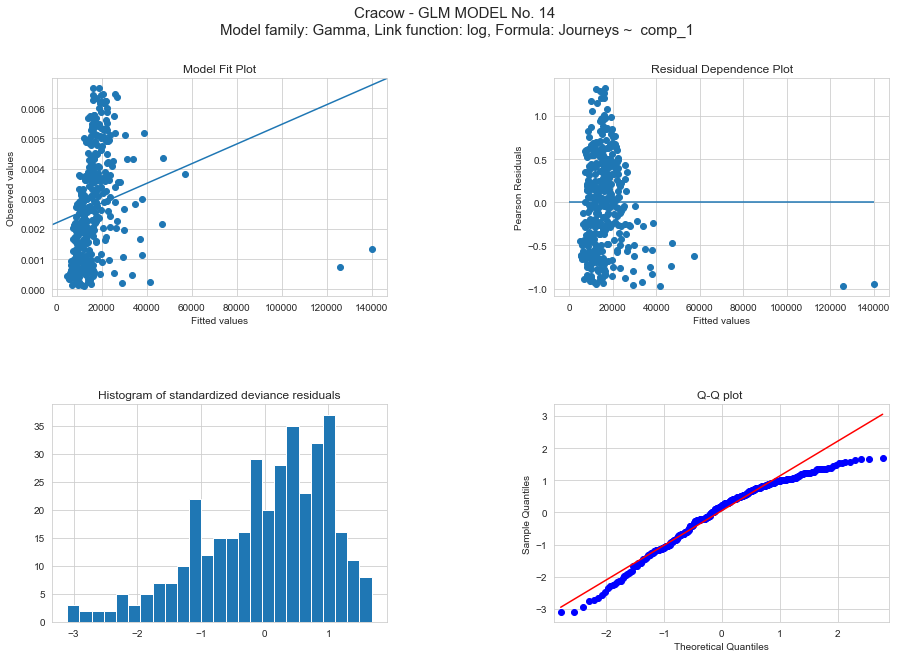

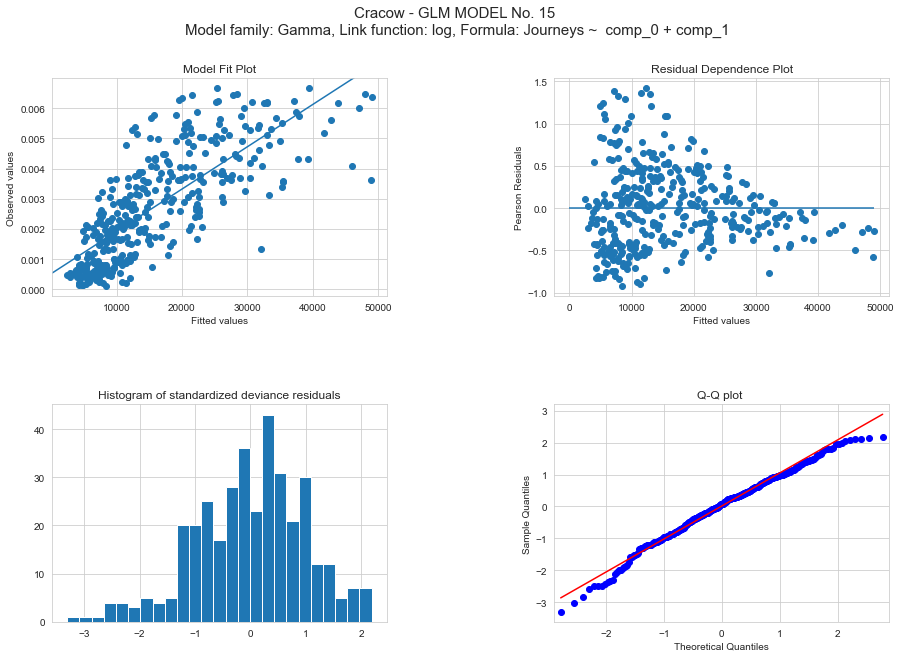

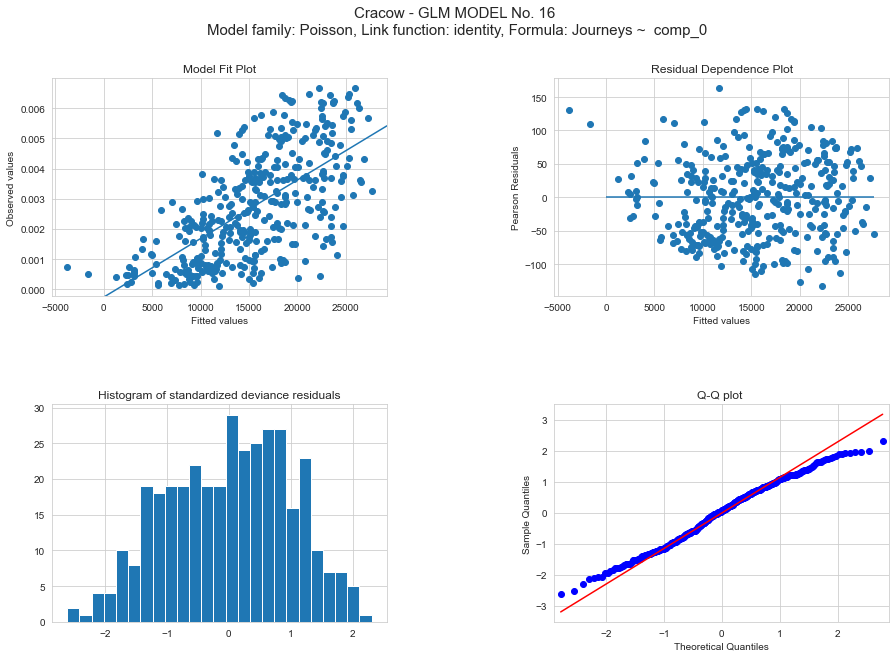

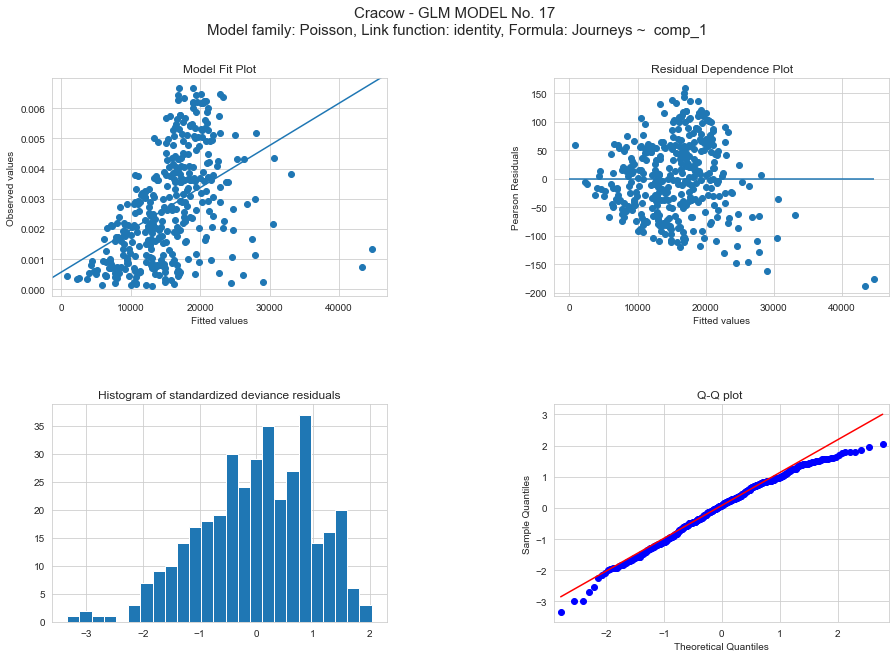

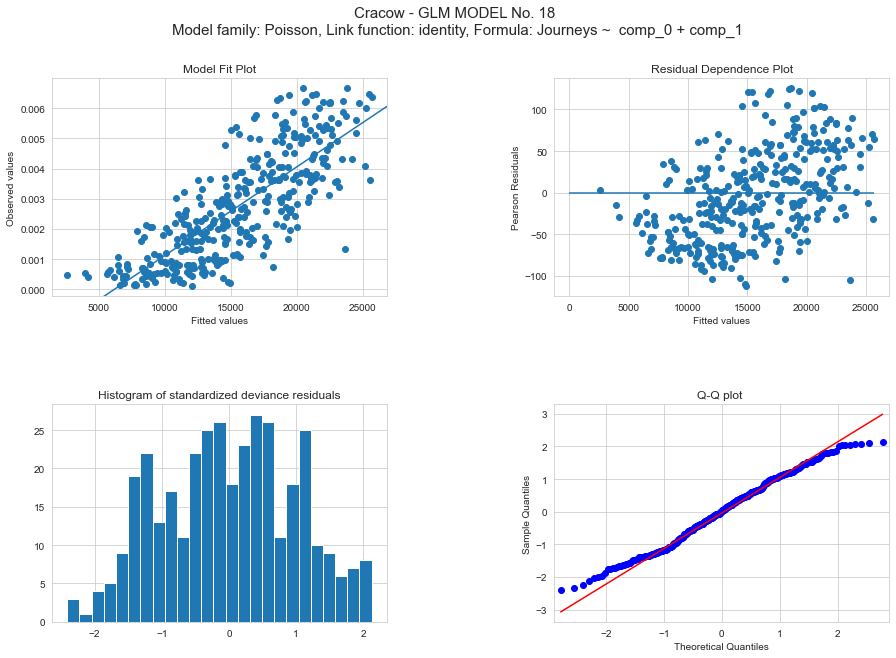

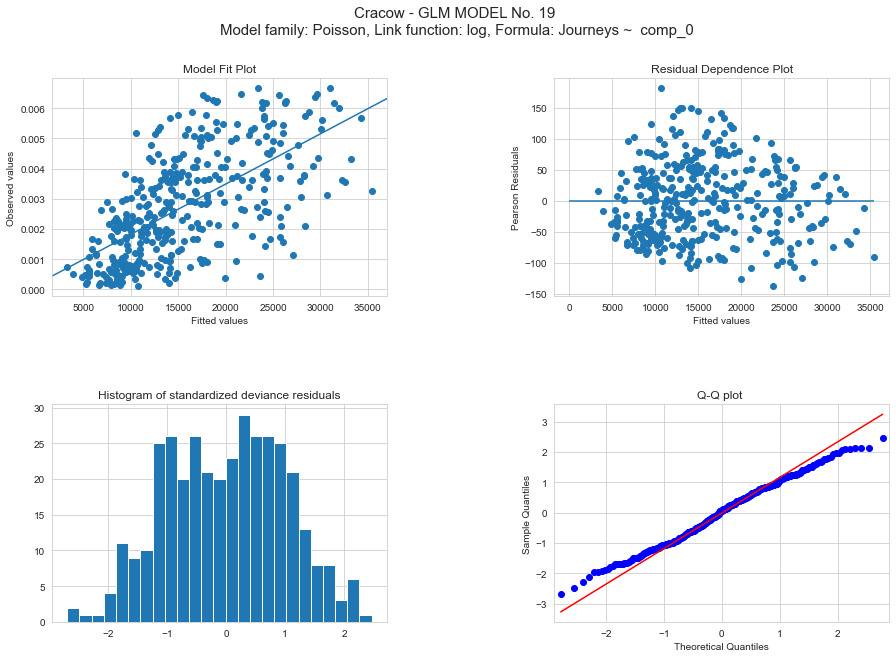

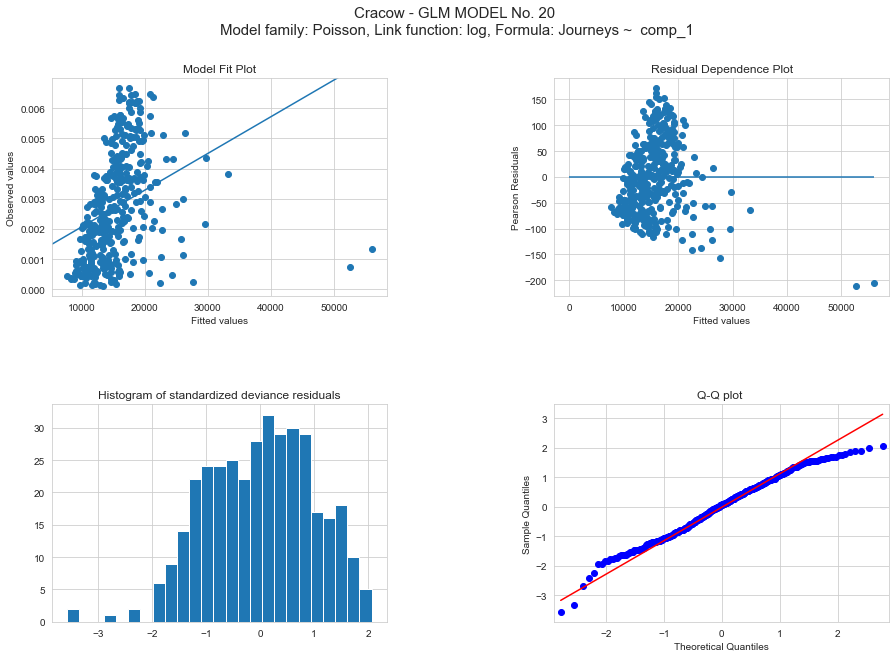

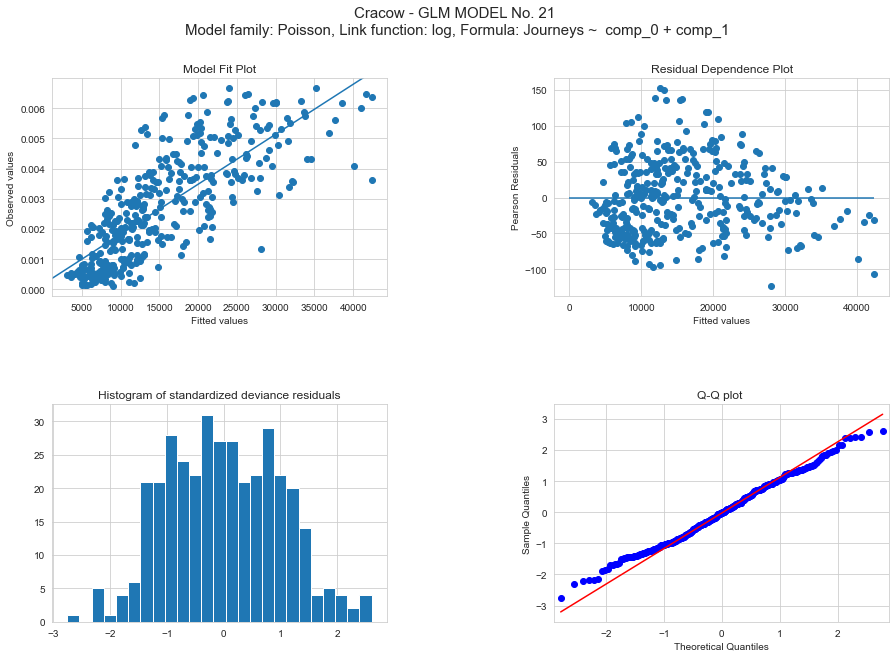

In [13]:
explained_variable = cracow.Journeys
constant = 'Journeys ~ '
result_table = []
a=1
y = explained_variable[:,]/explained_variable.sum()

for i in range(0,len(familia)):
    for x in range(0,len(formula)):
        print('Model No.',a)
        mod = smf.glm(formula=constant+formula[x], data=cracow, family=familia[i]).fit()
        yhat = mod.mu
        form = formula[x]
        result_table.append([f'Model No. {a}',form,(math.sqrt(mod.df_resid/abs(mod.deviance))),round(mod.aic,2), r2_score(explained_variable,mod.mu), familia2[i], mod.summary2().tables[0][1][1]])
        print('\n\n')
        print(mod.summary())
        #### Wykresy ----------------------------------------------------------------------------
        figGLM = plt.figure(figsize=[15,10])
        plt.subplots_adjust(wspace=0.5, hspace=0.5)
        plt.suptitle(f'Cracow - GLM MODEL No. {a} \nModel family: {familia2[i]}, Link function: {mod.summary2().tables[0][1][1]}, Formula: {constant} {form}', fontsize=15)

        ax1GLM = figGLM.add_subplot(221)
        ax1GLM.scatter(yhat, y)
        line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
        abline_plot(model_results=line_fit, ax=ax1GLM)
        ax1GLM.set_title('Model Fit Plot')
        ax1GLM.set_ylabel('Observed values')
        ax1GLM.set_xlabel('Fitted values')

        ax2GLM = figGLM.add_subplot(222)
        ax2GLM.scatter(yhat, mod.resid_pearson)
        ax2GLM.hlines(0, 0, yhat.max())
        ax2GLM.set_title('Residual Dependence Plot')
        ax2GLM.set_ylabel('Pearson Residuals')
        ax2GLM.set_xlabel('Fitted values')

        ax3GLM = figGLM.add_subplot(223)
        resid = mod.resid_deviance.copy()
        resid_std = stats.zscore(resid)
        ax3GLM.hist(resid_std, bins=25)
        ax3GLM.set_title('Histogram of standardized deviance residuals')

        ax4GLM = figGLM.add_subplot(224)
        ax4GLM.set_title('Q-Q plot ')
        sm.qqplot(resid, fit = True, line='q', ax = ax4GLM)
        plt.plot()
        print('AIC: ',round(mod.aic,2),'McFadden: ',r2_score(explained_variable,mod.mu))
        print('\n\n')
        a += 1

In [14]:
result_GLM = pd.DataFrame(result_table)

In [15]:
result_GLM.rename(columns={0:'Model',1:'Formula',2:'residuals_std_dev',3:'AIC',4:'McFadden',5:'Family',6:'Link'},inplace=True)

In [16]:
result_GLM.loc[result_GLM.AIC.isnull()]

,Model,Formula,residuals_std_dev,AIC,McFadden,Family,Link
15,Model No. 16,comp_0,0.020217,NaN,0.42565,Poisson,identity


In [17]:
result_GLM.sort_values(['AIC','McFadden'], ascending=[True,False]).head(10)

,Model,Formula,residuals_std_dev,AIC,McFadden,Family,Link
14,Model No. 15,comp_0 + comp_1,1.919400,7408.05,0.551785,Gamma,log
2,Model No. 3,comp_0 + comp_1,0.000161,7416.59,0.614356,Gaussian,log
12,Model No. 13,comp_0,1.631097,7536.24,0.376209,Gamma,log
0,Model No. 1,comp_0,0.000130,7569.99,0.409677,Gaussian,log
9,Model No. 10,comp_0,1.560460,7579.28,0.367473,Gamma,identity
10,Model No. 11,comp_1,1.487547,7604.22,0.186108,Gamma,identity
13,Model No. 14,comp_1,1.461365,7642.23,-0.793633,Gamma,log
8,Model No. 9,comp_0 + comp_1,146.257202,7699.32,0.411618,Inverse Gaussian,log
1,Model No. 2,comp_1,0.000107,7708.85,0.136400,Gaussian,log
5,Model No. 6,comp_0 + comp_1,133.307229,7763.19,0.314445,Inverse Gaussian,identity


CONCLUSION: The best GLM model (Model No.15) for cracow at full harvest did not achieve better results than the regular ML.

<hr>  